In [1]:
%reload_kedro

2023-08-23 18:55:38,877 - kedro.extras.extensions.ipython - INFO - No path argument was provided. Using: /Users/gpalazzo/Desktop/dev/crypto_msc_thesis
2023-08-23 18:55:39,237 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2023-08-23 18:55:39,326 - kedro.extras.extensions.ipython - INFO - ** Kedro project crypto_thesis
2023-08-23 18:55:39,327 - kedro.extras.extensions.ipython - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`
2023-08-23 18:55:39,333 - kedro.extras.extensions.ipython - INFO - Registered line magic `run_viz`


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import quantstats as qs
import seaborn as sns

## XGBoost

### Operations Profit over Time

In [4]:
df_portf_pnl = catalog.load("xgboost_portfolio_pnl")

2023-08-23 18:55:39,968 - kedro.io.data_catalog - INFO - Loading data from `xgboost_portfolio_pnl` (ParquetDataSet)...


In [5]:
df_ops = df_portf_pnl[["close_time", "op_full_profit"]] \
                .sort_values(by="close_time", ascending=True) \
                .reset_index(drop=True)

accum_mean = []
accum_std = []

for i in range(len(df_ops.index)):
    _accum_mean = df_ops.iloc[0:i+1].op_full_profit.mean()
    _accum_std = df_ops.iloc[0:i+1].op_full_profit.std(ddof=1)
    
    accum_mean.append(_accum_mean)
    accum_std.append(_accum_std)
    
# accum_std[0] = 0.0 #first data point has std as NaN, so substitute by 0

df_ops.loc[:, "mean"] = accum_mean
df_ops.loc[:, "std"] = accum_std

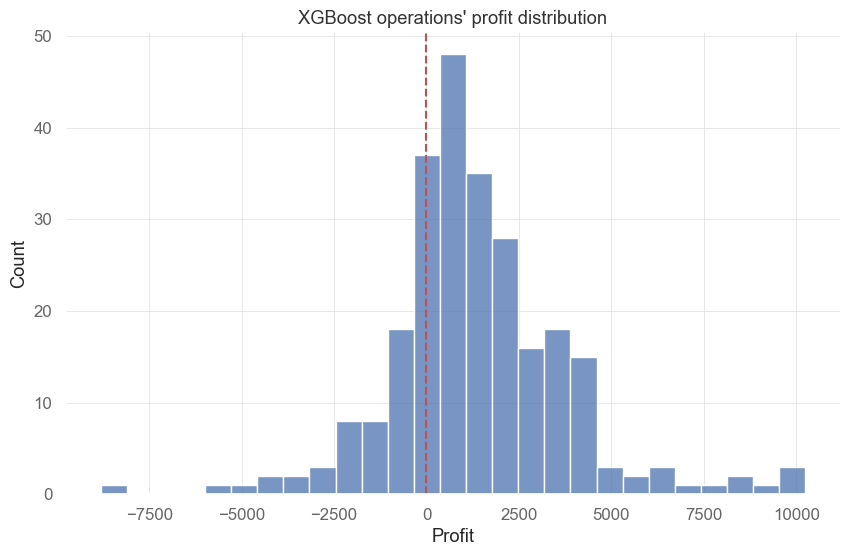

In [6]:
df = df_ops[["close_time", "op_full_profit"]] \
            .rename(columns={"close_time": "Date",
                            "op_full_profit": "Profit"}) \
            .set_index("Date") \
            .sort_index()

plot = sns.histplot(data=df,
             legend=None,
             x="Profit",
            ) \
            .set(title="XGBoost operations' profit distribution")

plt.axvline(x=0, color="r", ls="--")

plt.savefig("/Users/gpalazzo/Desktop/fig_xgboost_ops_profit.png")

<Axes: title={'center': "Operations' Profit std over time"}, xlabel='Date', ylabel='Profit Std'>

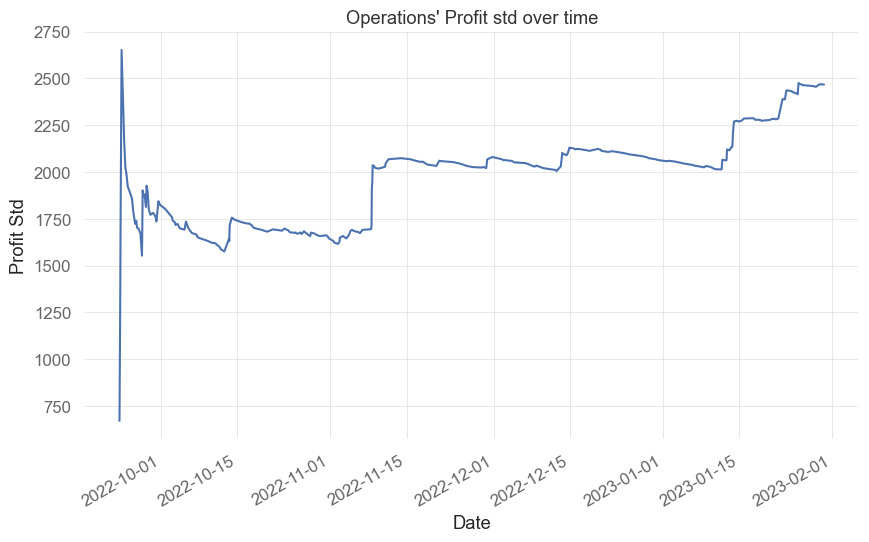

In [7]:
df_ops[["close_time", "std"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit std over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Std"
                    )

<Axes: title={'center': "Operations' Profit mean over time"}, xlabel='Date', ylabel='Profit Mean'>

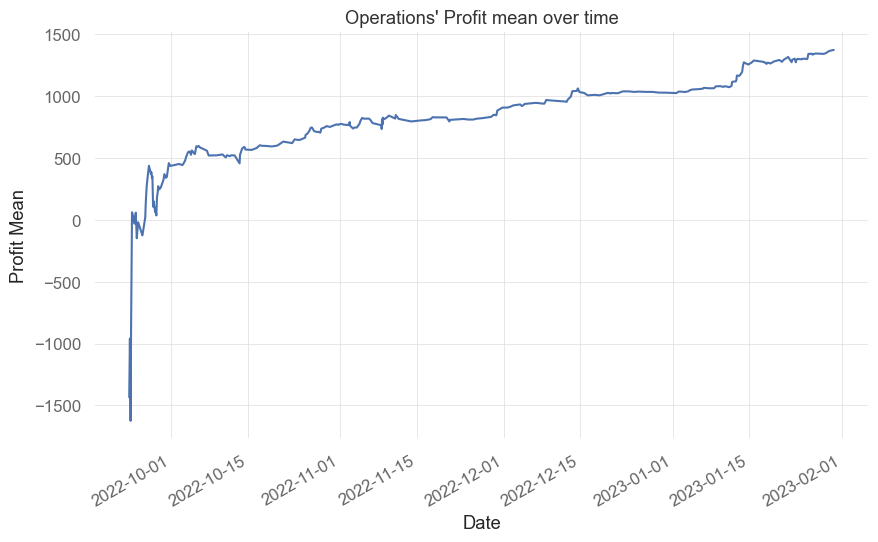

In [8]:
df_ops[["close_time", "mean"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit mean over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Mean"
                    )

## LSTM

### Operations Profit over Time

In [9]:
df_portf_pnl = catalog.load("lstm_portfolio_pnl")

2023-08-23 18:55:41,217 - kedro.io.data_catalog - INFO - Loading data from `lstm_portfolio_pnl` (ParquetDataSet)...


In [10]:
df_ops = df_portf_pnl[["close_time", "op_full_profit"]] \
                .sort_values(by="close_time", ascending=True) \
                .reset_index(drop=True)

accum_mean = []
accum_std = []

for i in range(len(df_ops.index)):
    _accum_mean = df_ops.iloc[0:i+1].op_full_profit.mean()
    _accum_std = df_ops.iloc[0:i+1].op_full_profit.std(ddof=1)
    
    accum_mean.append(_accum_mean)
    accum_std.append(_accum_std)
    
# accum_std[0] = 0.0 #first data point has std as NaN, so substitute by 0

df_ops.loc[:, "mean"] = accum_mean
df_ops.loc[:, "std"] = accum_std

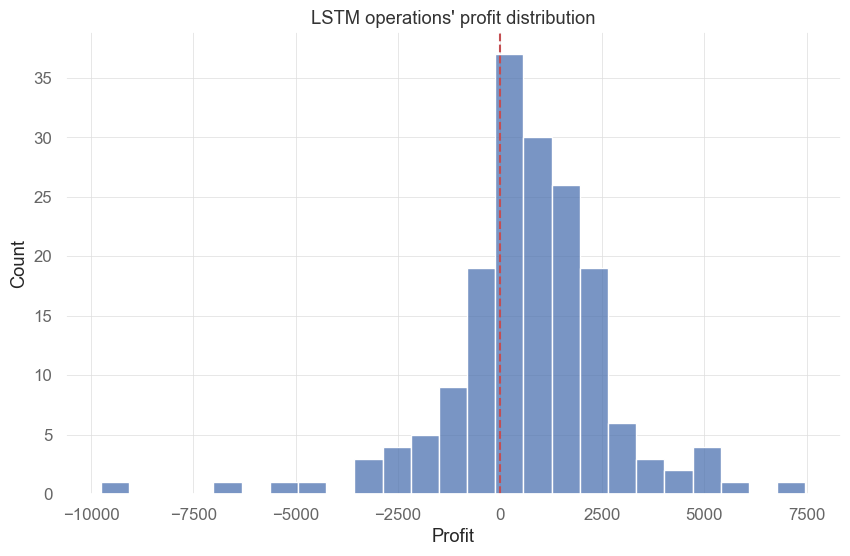

In [11]:
df = df_ops[["close_time", "op_full_profit"]] \
            .rename(columns={"close_time": "Date",
                            "op_full_profit": "Profit"}) \
            .set_index("Date") \
            .sort_index()

plot = sns.histplot(data=df,
             legend=None,
             x="Profit",
            ) \
            .set(title="LSTM operations' profit distribution")

plt.axvline(x=0, color="r", ls="--")

plt.savefig("/Users/gpalazzo/Desktop/fig_lstm_ops_profit.png")

<Axes: title={'center': "Operations' Profit std over time"}, xlabel='Date', ylabel='Profit Std'>

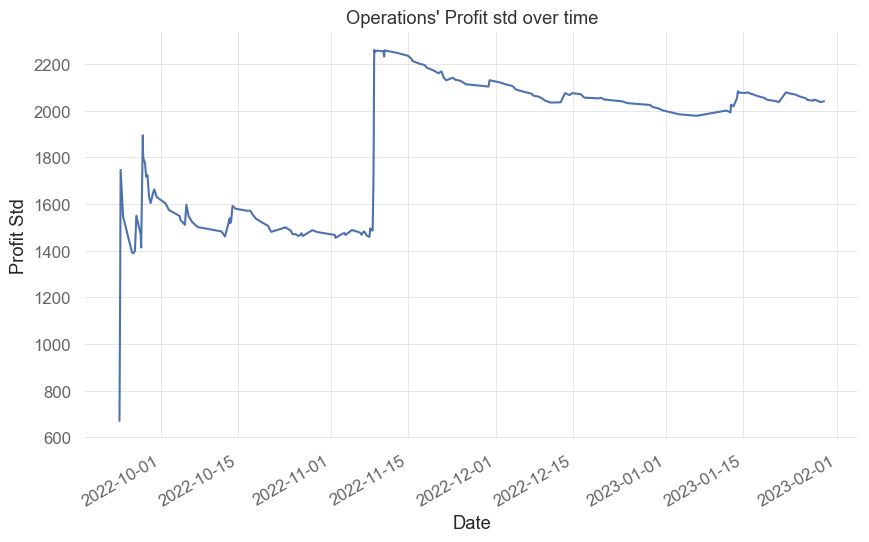

In [12]:
df_ops[["close_time", "std"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit std over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Std"
                    )

<Axes: title={'center': "Operations' Profit mean over time"}, xlabel='Date', ylabel='Profit Mean'>

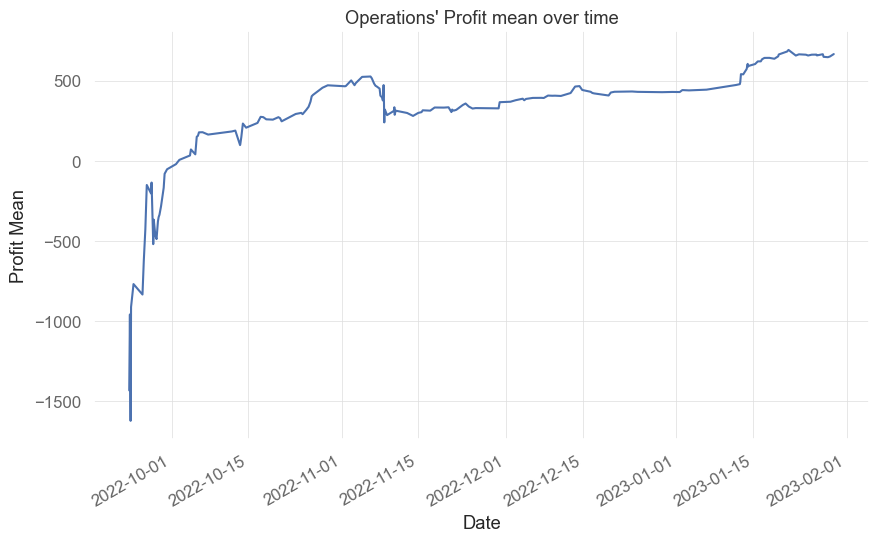

In [13]:
df_ops[["close_time", "mean"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit mean over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Mean"
                    )

## LogReg

### Operations Profit over Time

In [14]:
df_portf_pnl = catalog.load("logreg_portfolio_pnl")

2023-08-23 18:55:42,194 - kedro.io.data_catalog - INFO - Loading data from `logreg_portfolio_pnl` (ParquetDataSet)...


In [15]:
df_ops = df_portf_pnl[["close_time", "op_full_profit"]] \
                .sort_values(by="close_time", ascending=True) \
                .reset_index(drop=True)

accum_mean = []
accum_std = []

for i in range(len(df_ops.index)):
    _accum_mean = df_ops.iloc[0:i+1].op_full_profit.mean()
    _accum_std = df_ops.iloc[0:i+1].op_full_profit.std(ddof=1)
    
    accum_mean.append(_accum_mean)
    accum_std.append(_accum_std)
    
# accum_std[0] = 0.0 #first data point has std as NaN, so substitute by 0

df_ops.loc[:, "mean"] = accum_mean
df_ops.loc[:, "std"] = accum_std

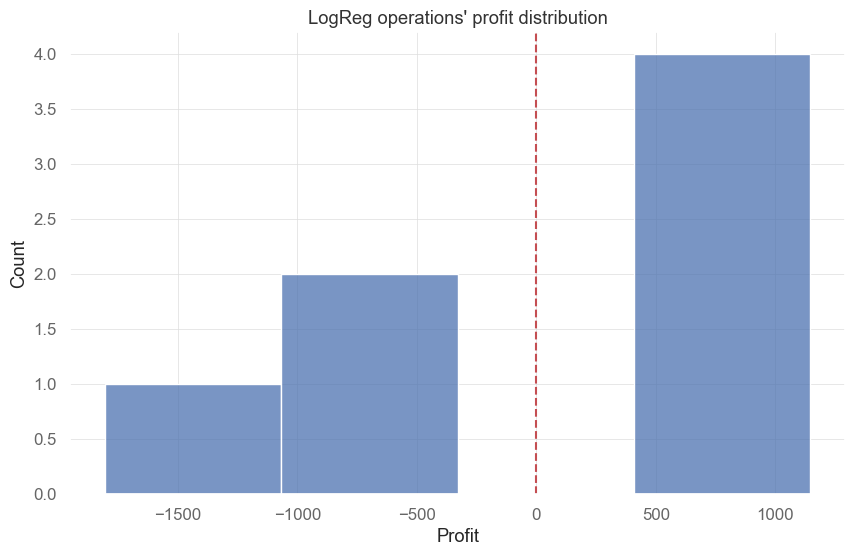

In [16]:
df = df_ops[["close_time", "op_full_profit"]] \
            .rename(columns={"close_time": "Date",
                            "op_full_profit": "Profit"}) \
            .set_index("Date") \
            .sort_index()

plot = sns.histplot(data=df,
             legend=None,
             x="Profit",
            ) \
            .set(title="LogReg operations' profit distribution")

plt.axvline(x=0, color="r", ls="--")

plt.savefig("/Users/gpalazzo/Desktop/fig_logreg_ops_profit.png")

<Axes: title={'center': "Operations' Profit std over time"}, xlabel='Date', ylabel='Profit Std'>

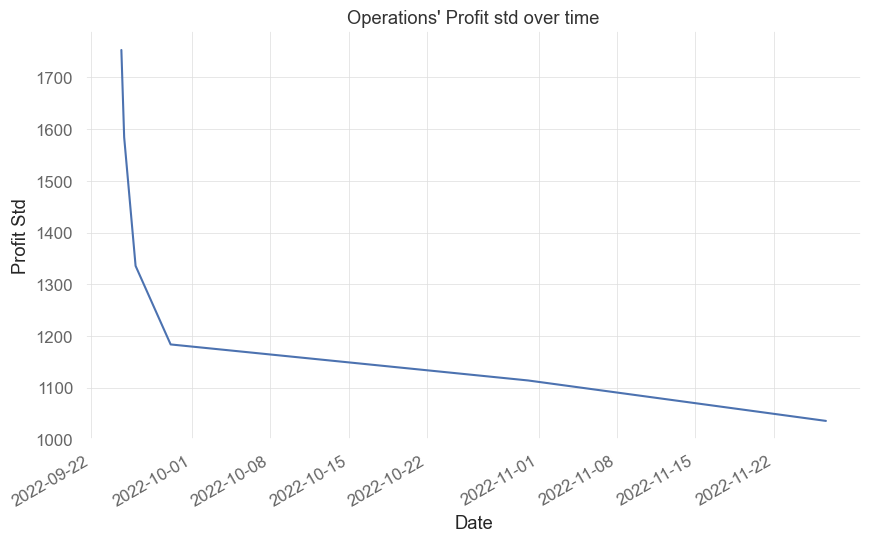

In [17]:
df_ops[["close_time", "std"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit std over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Std"
                    )

<Axes: title={'center': "Operations' Profit mean over time"}, xlabel='Date', ylabel='Profit Mean'>

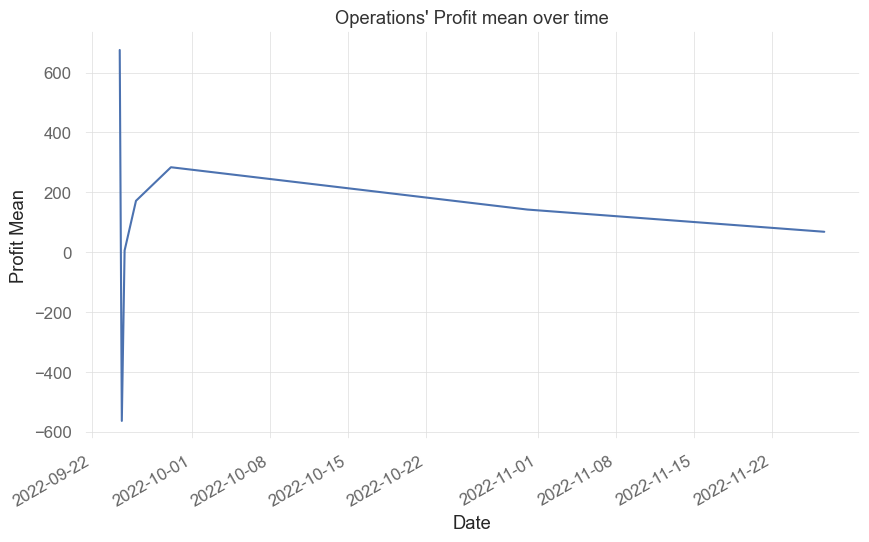

In [18]:
df_ops[["close_time", "mean"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit mean over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Mean"
                    )

## Benchmark

In [19]:
df_portf_pnl_benchmark = catalog.load("benchmark_trendfollowing_pnl")

df_portf_pnl_benchmark.loc[:, "logret_pos"] = np.log(1 + df_portf_pnl_benchmark["pctchg_pos"])

df_portf_pnl_benchmark = df_portf_pnl_benchmark[["close_time", "pctchg_pos", "logret_pos"]] \
                        .rename(columns={"close_time": "date"}) \
                        .set_index("date").sort_index()

df_portf_pnl_benchmark.loc[:, "logret_accum"] = df_portf_pnl_benchmark["logret_pos"].cumsum()
df_portf_pnl_benchmark.loc[:, "pctchg_accum"] = np.exp(df_portf_pnl_benchmark["logret_accum"]) - 1

df_portf_pnl_benchmark = df_portf_pnl_benchmark[["pctchg_pos", "pctchg_accum"]] \
                    .rename(columns={"pctchg_pos": "portf_pctchg_pos_benchmark",
                                   "pctchg_accum": "portf_pctchg_accum_benchmark"})

df_portf_pnl_benchmark.index = pd.to_datetime(df_portf_pnl_benchmark.index)

2023-08-23 18:55:43,032 - kedro.io.data_catalog - INFO - Loading data from `benchmark_trendfollowing_pnl` (ParquetDataSet)...


## XGBoost

### Portfolio overall metrics - Part 1

In [20]:
df_portf_metr = catalog.load("xgboost_portfolio_metrics")
df_portf_metr.loc[:, "model"] = "xgboost"
df_portf_metr

2023-08-23 18:55:43,057 - kedro.io.data_catalog - INFO - Loading data from `xgboost_portfolio_metrics` (ParquetDataSet)...


,nominal_profit,consecutive_wins,consecutive_losses,model
0,352307.945782,32,4,xgboost


### Portfolio overall metrics - Part 2

In [21]:
df_portf_pnl = catalog.load("xgboost_portfolio_pnl")

df_portf_pnl.loc[:, "logret_pos"] = np.log(1 + df_portf_pnl["pctchg_pos"])

df_logret = df_portf_pnl[["close_time", "pctchg_pos", "logret_pos"]] \
                        .rename(columns={"close_time": "date"}) \
                        .set_index("date").sort_index()

df_logret.loc[:, "logret_accum"] = df_logret["logret_pos"].cumsum()
df_logret.loc[:, "pctchg_accum"] = np.exp(df_logret["logret_accum"]) - 1

df_logret = df_logret[["pctchg_pos", "pctchg_accum"]] \
                    .rename(columns={"pctchg_pos": "portf_pctchg_pos",
                                   "pctchg_accum": "portf_pctchg_accum"})

df_logret.index = pd.to_datetime(df_logret.index)

xgboost = df_logret.copy()

2023-08-23 18:55:43,085 - kedro.io.data_catalog - INFO - Loading data from `xgboost_portfolio_pnl` (ParquetDataSet)...


In [22]:
qs.reports.metrics(returns=df_logret["portf_pctchg_pos"], periods_per_year=360, mode="full")

                           Strategy
-------------------------  ----------
Start Period               2022-09-23
End Period                 2023-01-30
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          234.87%
CAGR﹪                     2955.82%

Sharpe                     10.1
Prob. Sharpe Ratio         100.0%
Smart Sharpe               9.42
Sortino                    21.51
Smart Sortino              20.05
Sortino/√2                 15.21
Smart Sortino/√2           14.17
Omega                      4.4

Max Drawdown               -4.14%
Longest DD Days            6
Volatility (ann.)          16.94%
Calmar                     714.1
Skew                       0.12
Kurtosis                   2.53

Expected Daily %           0.47%
Expected Monthly %         27.34%
Expected Yearly %          83.0%
Kelly Criterion            61.66%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.99%
Expected Shortfall (cVaR)  -0.99%

Max Consecutive Wins

## LSTM

### Portfolio overall metrics - Part 1

In [23]:
df_portf_metr = catalog.load("lstm_portfolio_metrics")
df_portf_metr.loc[:, "model"] = "lstm"
df_portf_metr

2023-08-23 18:55:43,572 - kedro.io.data_catalog - INFO - Loading data from `lstm_portfolio_metrics` (ParquetDataSet)...


,nominal_profit,consecutive_wins,consecutive_losses,model
0,115084.210727,20,4,lstm


### Portfolio overall metrics - Part 2

In [24]:
df_portf_pnl = catalog.load("lstm_portfolio_pnl")

df_portf_pnl.loc[:, "logret_pos"] = np.log(1 + df_portf_pnl["pctchg_pos"])

df_logret = df_portf_pnl[["close_time", "pctchg_pos", "logret_pos"]] \
                        .rename(columns={"close_time": "date"}) \
                        .set_index("date").sort_index()

df_logret.loc[:, "logret_accum"] = df_logret["logret_pos"].cumsum()
df_logret.loc[:, "pctchg_accum"] = np.exp(df_logret["logret_accum"]) - 1

df_logret = df_logret[["pctchg_pos", "pctchg_accum"]] \
                    .rename(columns={"pctchg_pos": "portf_pctchg_pos",
                                   "pctchg_accum": "portf_pctchg_accum"})

df_logret.index = pd.to_datetime(df_logret.index)

lstm = df_logret.copy()

2023-08-23 18:55:43,593 - kedro.io.data_catalog - INFO - Loading data from `lstm_portfolio_pnl` (ParquetDataSet)...


In [25]:
qs.reports.metrics(returns=df_logret["portf_pctchg_pos"], periods_per_year=360, mode="full")

                           Strategy
-------------------------  ----------
Start Period               2022-09-23
End Period                 2023-01-29
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          76.72%
CAGR﹪                     407.19%

Sharpe                     5.78
Prob. Sharpe Ratio         99.96%
Smart Sharpe               5.68
Sortino                    8.93
Smart Sortino              8.76
Sortino/√2                 6.31
Smart Sortino/√2           6.2
Omega                      2.4

Max Drawdown               -9.06%
Longest DD Days            14
Volatility (ann.)          20.91%
Calmar                     44.93
Skew                       -1.04
Kurtosis                   5.95

Expected Daily %           0.33%
Expected Monthly %         12.06%
Expected Yearly %          32.94%
Kelly Criterion            42.43%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.48%
Expected Shortfall (cVaR)  -1.48%

Max Consecutive Wins    

## LogReg

### Portfolio overall metrics - Part 1

In [26]:
df_portf_metr = catalog.load("logreg_portfolio_metrics")
df_portf_metr.loc[:, "model"] = "LogReg"
df_portf_metr

2023-08-23 18:55:44,008 - kedro.io.data_catalog - INFO - Loading data from `logreg_portfolio_metrics` (ParquetDataSet)...


,nominal_profit,consecutive_wins,consecutive_losses,model
0,475.233735,3,2,LogReg


### Portfolio overall metrics - Part 2

In [27]:
df_portf_pnl = catalog.load("logreg_portfolio_pnl")

df_portf_pnl.loc[:, "logret_pos"] = np.log(1 + df_portf_pnl["pctchg_pos"])

df_logret = df_portf_pnl[["close_time", "pctchg_pos", "logret_pos"]] \
                        .rename(columns={"close_time": "date"}) \
                        .set_index("date").sort_index()

df_logret.loc[:, "logret_accum"] = df_logret["logret_pos"].cumsum()
df_logret.loc[:, "pctchg_accum"] = np.exp(df_logret["logret_accum"]) - 1

df_logret = df_logret[["pctchg_pos", "pctchg_accum"]] \
                    .rename(columns={"pctchg_pos": "portf_pctchg_pos",
                                   "pctchg_accum": "portf_pctchg_accum"})

df_logret.index = pd.to_datetime(df_logret.index)

logreg = df_logret.copy()

2023-08-23 18:55:44,032 - kedro.io.data_catalog - INFO - Loading data from `logreg_portfolio_pnl` (ParquetDataSet)...


In [28]:
qs.reports.metrics(returns=df_logret["portf_pctchg_pos"], periods_per_year=360, mode="full")

                           Strategy
-------------------------  ----------
Start Period               2022-09-24
End Period                 2022-11-26
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          0.32%
CAGR﹪                     1.85%

Sharpe                     1.3
Prob. Sharpe Ratio         56.45%
Smart Sharpe               0.95
Sortino                    1.85
Smart Sortino              1.35
Sortino/√2                 1.31
Smart Sortino/√2           0.96
Omega                      1.18

Max Drawdown               -1.2%
Longest DD Days            26
Volatility (ann.)          13.07%
Calmar                     1.54
Skew                       -1.03
Kurtosis                   0.39

Expected Daily %           0.05%
Expected Monthly %         0.11%
Expected Yearly %          0.32%
Kelly Criterion            8.78%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.09%
Expected Shortfall (cVaR)  -1.09%

Max Consecutive Wins       3
Ma

## Cumulative Returns

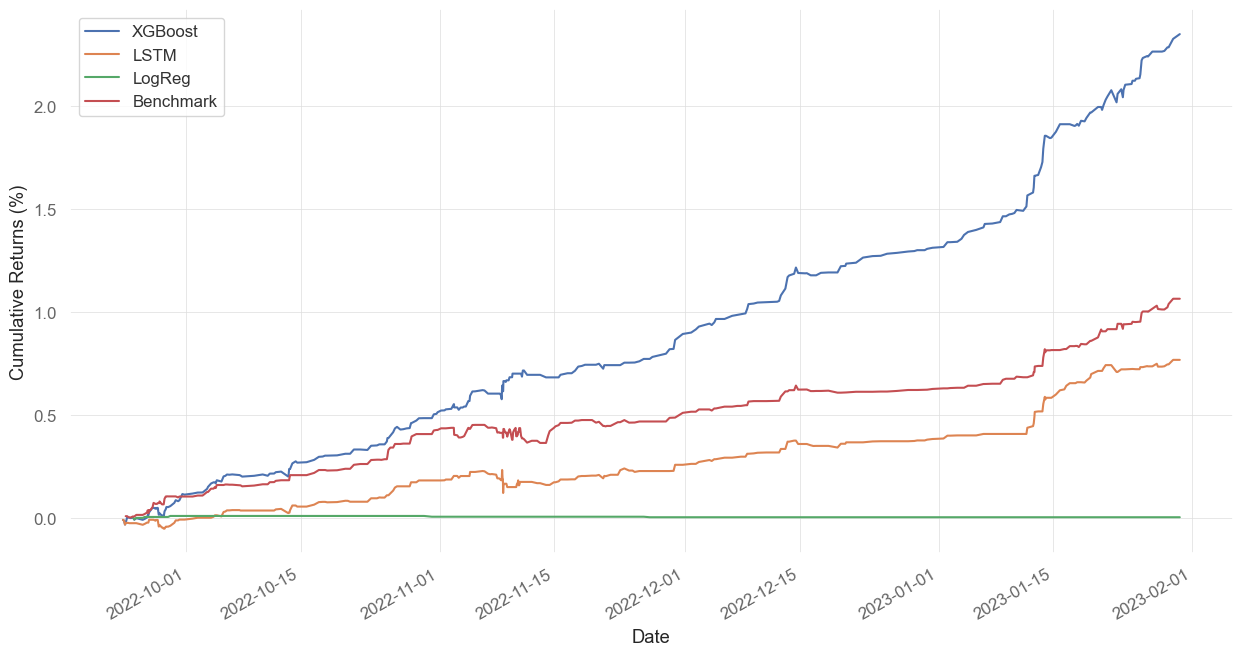

In [29]:
df = xgboost[["portf_pctchg_accum"]].rename(columns={"portf_pctchg_accum": "XGBoost"}) \
        .merge(lstm[["portf_pctchg_accum"]].rename(columns={"portf_pctchg_accum": "LSTM"}), 
               left_index=True, 
               right_index=True, 
               how="outer") \
        .merge(logreg[["portf_pctchg_accum"]].rename(columns={"portf_pctchg_accum": "LogReg"}), 
               left_index=True, 
               right_index=True, 
               how="outer") \
        .merge(df_portf_pnl_benchmark[["portf_pctchg_accum_benchmark"]] \
                       .rename(columns={"portf_pctchg_accum_benchmark": "Benchmark"}), 
               left_index=True, 
               right_index=True, 
               how="outer")

plot = df.ffill().plot(figsize=(15, 8))

plt.xlabel("Date")
plt.ylabel("Cumulative Returns (%)")

fig = plot.get_figure()
fig.savefig("/Users/gpalazzo/Desktop/fig_portfolios_vs_benchmk_rets.png")